Program to implement PCA for Wisconsin dataset, visualize and analyze the results.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Load dataset
df = pd.read_csv("<path_to_your_file>data.csv")
print("=== First 5 Rows ===")
print(df.head())

=== First 5 Rows ===
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  a

In [9]:
# Drop non-numeric/unwanted columns
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

In [10]:
# Separate features and target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]
print("\nOriginal Shape of Features:", X.shape)


Original Shape of Features: (569, 30)


In [11]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("\nShape after PCA:", X_pca.shape)


Shape after PCA: (569, 2)


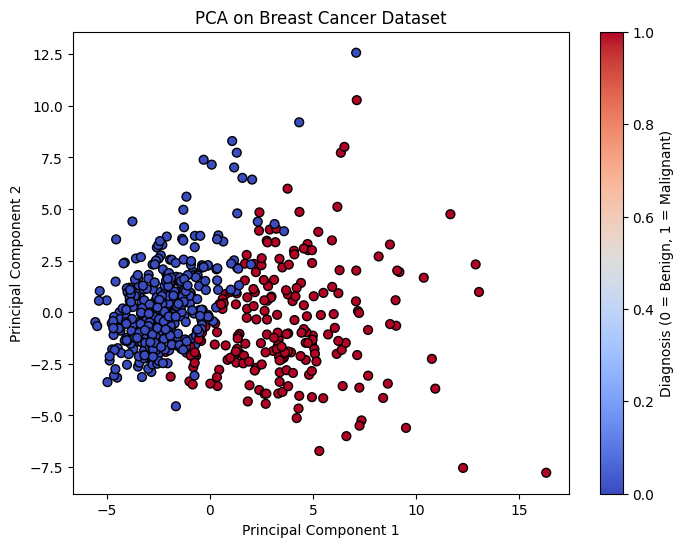

In [13]:
# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=(y == "M"), cmap='coolwarm', edgecolor='k', s=40)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Breast Cancer Dataset")
plt.colorbar(label="Diagnosis (0 = Benign, 1 = Malignant)")
plt.show()

In [14]:
# Print explained variance ratio
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.44272026 0.18971182]
